In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA 

In [2]:
# load in our training and test data
data_train = pd.read_csv('data/df_train.csv')
data_test = pd.read_csv('data/df_test.csv')
total_data = pd.concat([data_train, data_test])


# split data
X_train = data_train[data_train.columns[0:-1]]
y_train = data_train[data_train.columns[-1]]
X_test = data_test[data_test.columns[0:-1]]
y_test = data_test[data_test.columns[-1]]

print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(149, 9) (149,) (65, 9) (65,)


In [3]:
#Min Max Normalisation
def normalise_data(X):
    for column in X.columns:
        X[column] = normalise(X[column])
    return X
def normalise(column):
    min_column = column.min()
    max_column = column.max()
    normaliser = lambda entry: (entry-min_column)/(max_column-min_column + 0.000001)
    column = column.apply(normaliser)
    return column

# Data standardization
norm = StandardScaler()

def missing_values(X_train):        
    if len(np.unique(X_train.notna())) < 1:
        print('The Dataset contains missing values and must be addressed')
    else:
        print('The Dataset does not contain any missing Values')

missing_values(X_train)


The Dataset does not contain any missing Values


In [4]:
# Normalise data
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

#X_train_norm = normalise_data(X_train)
#X_test_norm = normalise_data(X_test)


# Export to csv
X_train.to_csv('data/X_train.csv',index=False)
y_train.to_csv('data/y_train.csv',index=False)

X_train_norm = pd.DataFrame(X_train_norm)
X_train_norm.to_csv('data/X_train_normalised.csv',index=False)
X_test_norm = pd.DataFrame(X_test_norm)
X_test_norm.to_csv('data/X_test_normalised.csv',index=False)


# Synthetic data
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_train_norm, y_train)

X_res.to_csv('data/X_train_synth.csv',index=False)
y_res.to_csv('data/y_train_synth.csv',index=False)

X_test.to_csv('data/X_test.csv',index=False)
y_test.to_csv('data/y_test.csv',index=False)

# len of synth dataset is 318 - 53 * 6

In [5]:
### PCA

pca = PCA(n_components=3)
pca_ = pca.fit(X_train_norm)
X_train_pca = pca_.transform(X_train_norm)
X_test_pca = pca_.transform(X_test_norm)

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
X_train_pca.to_csv('data/X_train_pca.csv',index=False)
X_test_pca.to_csv('data/X_test_pca.csv',index=False)


In [6]:
total_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
summ = total_data[total_data.columns[1:-1]]
recordsum = summ.sum(axis =1)

print(recordsum.min(),recordsum.mean(),recordsum.max())

99.02 99.87429906542056 100.09999999999998


Text(0, 0.5, 'Instances')

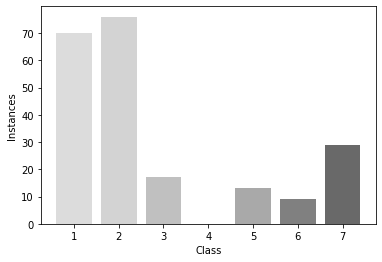

In [8]:
cla = {class_c : len(total_data[total_data['type']==class_c]) for class_c in np.unique([total_data['type']])}
c=[]
n = []
for clas, entries in cla.items():
    c.append(clas)
    n.append(entries)
plt.bar(c, n, color=['#DCDCDC', '#D3D3D3', '#C0C0C0', '#A9A9A9', '#808080','#696969','#778899'])
plt.xlabel('Class')
plt.ylabel('Instances')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d3705a64-676d-4660-b6e8-fa8b10c2e69e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>